Quiz and other

# 8.1

We are given the linear functions $f : \mathbb{R}^n \rightarrow \mathbb{R}^m $ and $g : \mathbb{R}^n \rightarrow \mathbb{R}^m $ and told that their sum is the function $h : \mathbb{R}^n \rightarrow \mathbb{R}^m $. This is defined as $h(x) = f(x) + g(x)$ with x being an n-vector. We are told $f$ and $g$ have matrix representations of $f(x) = Fx$ and $g(x) = Gx$, respectively. We are asked to show the matrix representation for their sum $h(x)$?


$h(x) = f(x) + g(x)$ //both f and g return m-vectors and the addition is over n-vectors

__By way of substitution__

$h(x) = Fx + Gx$ //Fx and Gx are matrix vector multiplication and result in n-vectors and this results in addition over n-vectors  

__Factor F+G__

$h(x) = (F + G)x$ //F+G are matrices so this is our matrix representation. The result of a m*n matrix with an n-vector is and n-vector.  

In [1]:
import numpy as np
#pg 163 exmaple 
A = np.array([[1,1,0],[0,1,1]])
x = np.array([1,0,2])
b = A@x
y = b@(A+A)


In [2]:
x.shape

(3,)

Determing whether a set of linear equations has a solution is covered later in chp. 11 not here. 

In [17]:
A = np.array([1,2,3,4])
B = np.array([[3,7,2,8]]).T
A@B

array([55])

In [18]:
A = np.array([1,2,3,4])
B = np.array([[7,6,5,8]]).T

In [19]:
result = np.zeros([4,4])
#This is computing the outer product
for i in range(4):
    for j in range(4):
        #A[i]*B[j]
        result[i][j] = B[i]*A[j]
result        

array([[ 7., 14., 21., 28.],
       [ 6., 12., 18., 24.],
       [ 5., 10., 15., 20.],
       [ 8., 16., 24., 32.]])

In [20]:
np.outer(B,A)

array([[ 7, 14, 21, 28],
       [ 6, 12, 18, 24],
       [ 5, 10, 15, 20],
       [ 8, 16, 24, 32]])

# 8.4 
a. Here we are told the image is provided as an n-vector flattened column wise and we are asked to find a matrix A which when the inner product of A and x is computed the resulting n-vector, y, is the image flipped. This is, y= A@x results in a flipped image. We know y = I@x  = x and we can use unit vectors in a similar way here to get the flipped image or a rearranged version of the n-vector x. This is, we want to return $f(x) = (x_3,x_2,x_1,x_6,x_5,x_4,x_9,x_8,x_7)$ and to achieve this we can make a matrix composed of unit vectors. For this problem A is $[e_3,e_2,e_1,e_6,e_5,e_4,e_9,e_8,e_7]$.  This is demonstrated with the pyhton function flipImage, but there the matrix A is created using the reverser matrix. This is, $A = \begin{bmatrix}E & 0& 0\\ 0& E &0 \\ 0& 0 &E\end{bmatrix}$ where $E = \begin{bmatrix}0 & 0& 1\\ 0& 1 &0 \\ 1& 0 &0\end{bmatrix}$

In [1]:
#8.4 a
import numpy as np
def flipImage(x):
    #get img dimension and reshape img into a n-vector
    siz = x.shape
    x = x.flatten('F') #flatten array using Fortran column wise operation
    print('Here is the column wise flattend array: \n', x,"\n")
    I = np.identity(3) #create matrix A which is shown in latex below
    rm = np.fliplr(I) #reverserMatrix
    z = np.zeros([3,3])
    A = np.block([[rm,z,z],[z,rm,z],[z,z,rm]]) 
    print("This is the matrix A: \n", A)
    #compute y= Ax
    y = A@x 
    return np.reshape(y, siz, order='F') #reshape shape vector back to 3*3. Use Fortran column wise operation.  

# execute flipImage
x = np.array([[1,4,7],[2,5,8],[3,6,9]])
flipImage(x)

Here is the column wise flattend array: 
 [1 2 3 4 5 6 7 8 9] 

This is the matrix A: 
 [[0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]]


array([[3., 6., 9.],
       [2., 5., 8.],
       [1., 4., 7.]])

b. The idea here is similar to a. This is, the matrix A can be composed of unit vectors as follows  $A = [e_7,e_4,e_1,e_8,e_5,e_2,e_9,e_6,e_3]$. Here is code demonstrating this example.

In [2]:
#b Transform the image 
def RotNightyDeg(x,listOfUnitColumn):
    #get img dimension and reshape img into a n-vector
    siz = x.shape
    mn = siz[0]*siz[1]
    ind = list(range(mn))
    x = x.flatten('F')
    #print(x)
    A = np.zeros([mn,mn])
    #create matrix A with unit vecotrs as columns in order 
    for row,col in zip(ei,ind):
        A[row][col] = 1
    y = A@x
    #print(A)

    print("Output y = A@x : \n", y,"\n","\n y reshaped:")
    return np.reshape(y, siz, order='F') 

x = np.array([[1,4,7],[2,5,8],[3,6,9]])
ei = [6,3,0,7,4,1,8,5,2]
RotNightyDeg(x,ei)

Output y = A@x : 
 [3. 6. 9. 2. 5. 8. 1. 4. 7.] 
 
 y reshaped:


array([[3., 2., 1.],
       [6., 5., 4.],
       [9., 8., 7.]])

The image in the solution for b shows a rotation of 90 degrees counter clockwise not clockwise. Example of clockwise and counter clockwise rotations using numpy. 

In [3]:
np.rot90(x,-1)#clockwise rotation

array([[3, 2, 1],
       [6, 5, 4],
       [9, 8, 7]])

In [4]:
np.rot90(x) #counter clocwise

array([[7, 8, 9],
       [4, 5, 6],
       [1, 2, 3]])

c. We can use the same idea as in the other parts of this problem except here we do not want to return all values and the areas not returned will be padded with zeros. The column index in matrix A corresponds to each index $i$ in x. The indexes in x that we want to keep hold the unit vector $e_k$ where k is the new position of the value once at index $i$ in x. If the index in x is to be set to zero we set the column in matrix A corresponding to this index $i$ to be all zeros. For example, in this problem value 2 at i = 2 in x is transformed index k = 4 in the output n-vector y. This is achieved by having $e_4$ in column 2 of matrix A.  For this problem $A = [0,e_4,e_5,0,e_7,e_8,0,0,0]$. Below is code showing this example. 

In [5]:
#C same as b but we have some columns which are zeros in lieu of unit vectors
def TranslateUpOneDownOne(x,listOfUnitColumn):
    siz = x.shape
    mn = siz[0]*siz[1]
    ind = list(range(mn))
#    x = np.reshape(x, (len(x)*len(x)))
    x = x.flatten('F')
    A = np.zeros([mn,mn])
    #create matrix A with unit vecotrs as columns in order 
    
    for row,col in zip(ei,ind):
        #print(row,col)
        if row == 0:
            A[row][col] = 0    
        else: 
            A[row][col] = 1
            
    y = A@x
    
    return np.reshape(y, siz, order='F') 

ei = [0,3,4,0,6,7,0,0,0]
x = np.array([[1,4,7],[2,5,8],[3,6,9]])
TranslateUpOneDownOne(x,ei)

array([[0., 2., 5.],
       [0., 3., 6.],
       [0., 0., 0.]])

d. This really focuses on setting up matrix A so the corner pixels, center pixels, and edge pixels are computed with the correct number of neighboring components. This is, with matrix A is set up, as shown in the solution, the adjacent pixel values are used to compute the average of each pixel and with the correct  n. Here is code showing this in python.  

In [6]:
# d
x = np.array([[0,2,3],[4,5,6],[2,5,1]])
m,n = x.shape

A = [[0., 1/2, 0., 1/2, 0., 0., 0., 0., 0.],
[1/3, 0., 1/3, 0., 1/3, 0., 0., 0., 0.],
[ 0., 1/2, 0., 0., 0., 1/2, 0., 0., 0.],
[1/3, 0., 0., 0., 1/3, 0., 1/3, 0., 0.],
[0., 1/4, 0., 1/4, 0., 1/4, 0., 1/4, 0.],
[0., 0., 1/3, 0., 1/3, 0., 0., 0., 1/3],
[0., 0., 0., 1/2, 0., 0., 0., 1/2, 0.],
[0., 0., 0., 0., 1/3, 0., 1/3, 0., 1/3],
[0., 0., 0., 0., 0., 1/2, 0., 1/2, 0.]]
xFortranFlat = x.flatten('F')

y = A@xFortranFlat

np.reshape(np.round(y,2), (m,n), order='F') 

array([[3.  , 2.67, 4.  ],
       [2.33, 4.25, 3.  ],
       [4.5 , 2.67, 5.5 ]])

# 8.7

We are provided the following quartic polynomial $p(x) = c_1 +c_2x+c_3x^2+c_4x^3+c_5x^4$ and asked to express as set of conditions as a set of linear functions in the form $Ac = b$. The derivative of $p(x)$, is $\hat p(x) = c_2+2c_3x^1+3c_4x^2+4c_5x^3$. Conditions provided: 
* $p(0) = 0$
* $\hat p(0) = 0$
* $p(1) = 1$
* $\hat p(1) = 0$

By substitution

$p(0) = c_1 +c_2(0)+c_3(0)^2+c_4(0)^3+c_5(0)^4 = c_1 = 0$

$\hat p(0) = c_2+2c_3(0)^1+3c_4(0)^2+4c_5(0)^3 = c_2 = 0$

$p(1) = c_1 +c_2(1)+c_3(1)^2+c_4(1)^3+c_5(1)^4 = c_1 +c_2 +c_3+c_4+c_5$

$\hat p(1) = c_2+2c_3(1)^1+3c_4(1)^2+4c_5(1)^3 = c_2+2c_3+3c_4+4c_5$

Just for fun an attempt in python. 

In [12]:
import numpy as np
#Create a list of strings to represent the vector c with coefficients for the quartic polynomial 
c = ["c1","c2","c3","c4","c5"]
A = np.array([[1,0,0,0,0],[0,1,0,0,0],[1,1,1,1,1],[0,1,2,3,4]]) # create matrix A which

#compute the four linear equations given c and A
#since this is with strings we cannot simply take inner product using @. So went another route.
ci = []
for i in range(len(A)):
    for j in range(len(A[i])):
        if A[i][j] > 1: 
            #if there is more than 1 coefficient. Concatenate string with coefficients for the ith linear equation
            ci.append(str(A[i][j])+c[j])
        else:
        #else only one coefficient exist for equation
            ci.append(A[i][j]*c[j])

d = np.array(ci)#convert to an array that can be split
ciSplit = np.split(d,4)#split array into four equal parts. 
str_list = [list(filter(None, ciSplit[i])) for i in range(4)] #drop empty string in list


my_string = ''
m_str = ''
for word in str_list:
    if len(word) > 1:
        for w in range(len(word)):
            #print(word[w])
            m_str += str(str(word[w])+ "+")
        m_str += "end"
    else:
        my_string += str(str(word)+ ",")
#my_string = list([my_string[2:4],my_string[9:11]])

k = my_string.split(",")+ m_str.split("+end")

print("The four equations are: \n")
for i,j,l in zip(["p(0) = ","phat(0) = ","","p(1) = ","phat(1) = "],k,[" = 0","= 0",''," = 2", "= 0"]):
    print(i,j,l)

The four equations are: 

p(0) =  ['c1']  = 0
phat(0) =  ['c2'] = 0
  
p(1) =  c1+c2+c3+c4+c5  = 2
phat(1) =  c2+2c3+3c4+4c5 = 0


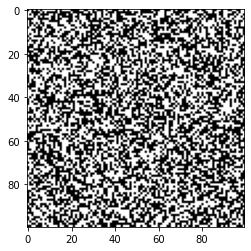

In [222]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2 
im = np.random.randint(2, size=(100, 100)) #create a matrix A of size m * n. Place random ints between 0 and 15
#create 255 bit image 
img = np.array(im * 1.0, dtype = np.double)
#Show the image with matplotlib
plt.imshow(img, cmap="gray")
plt.show()

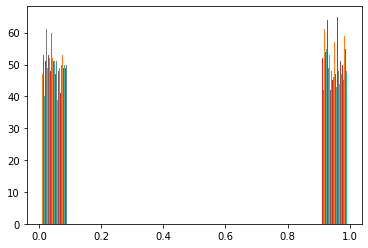

In [22]:
plt.hist(img);

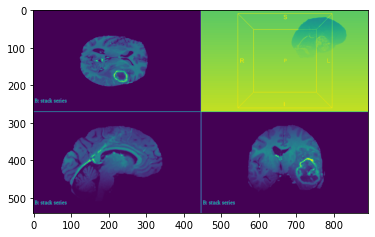

In [23]:
im = cv2.imread("test.png")
plt.imshow(im)
plt.imshow(im[:,:,0]);


In [24]:
img = np.array(im[:,:,0] * 1.0, dtype = np.double)

In [ ]:
plt.hist(img)
#plt.imshow(img.T)

In [ ]:
#crop the image 
cropped_image = img[60:210, 100:320]
plt.imshow(cropped_image);

In [ ]:
cropped_image = img[60:210, 150:320]
plt.imshow(cropped_image.T);

In [8]:
import numpy as np

In [9]:
#5 quiz 8
def f(x):
    return 2*x

In [11]:
x = np.array([0,1])
y = np.array([2,-3])
x

array([0, 1])

In [30]:
#f(alpha x + beta y)
a1 = 1/2
b1 = 1/2
f(a1*x + b1*y)

array([ 2., -2.])

In [31]:
a1*f(x) + b1*f(y)

array([ 2., -2.])

In [10]:
A = np.random.rand(3,2)
A

array([[0.46574388, 0.31835736],
       [0.6333009 , 0.4086852 ],
       [0.05909903, 0.3640818 ]])

In [11]:
x = np.random.rand(3)

In [12]:
A@x

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)